# **CUSTOMER CHURN ANALYSIS**

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

### Background

### Scenario

### Objective
 
### Hypothesis: 
This hypothesis is based on service usuage

**A. Rationale:**


**B. Null Hypothesis (H0):**
Null Hypothesis (H0): There is no significant difference in the churn rates between customers who use the service frequently and those who use it infrequently.


**C. Alternative Hypothesis (H1):**
Customers who use the service less frequently have a significantly higher churn rate compared to those who use it frequently.


### Key Business Questions

1 . What is the distribution of service usage frequencies among our customer base, and how does this distribution correlate with churn rates?

- This question aims to analyze the distribution of customers based on their frequency of service usage and explore whether there's a pattern indicating higher churn rates among less frequent users.

2.  Are there specific demographic segments (age, gender, location) that exhibit a stronger correlation between service usage frequency and churn rates?
- This question delves into demographic analysis to understand if certain groups of customers are more sensitive to service usage frequency in terms of churn behavior, providing insights for targeted retention strategies.

 3. What are the average customer lifetimes for different usage frequency segments, and how does this impact overall churn dynamics?

 - This question explores the relationship between service usage frequency and customer lifetime value, aiming to quantify how different usage patterns affect customer retention and churn over time.

 4.  How does the introduction of engagement initiatives (e.g., promotions, personalized recommendations) influence the churn rates of infrequent users compared to frequent users?

 - This question is to  investigates the effectiveness of proactive engagement strategies in mitigating churn, specifically comparing their impact on customers with varying levels of service usage.

 5.  What are the financial implications of reducing churn rates among infrequent users through targeted retention efforts, and how does this compare to efforts focused on frequent users?

- This question evaluates the potential return on investment (ROI) of retention strategies tailored to different segments based on service usage frequency, providing insights into resource allocation and revenue protection strategies.





## Step 2: Data Understanding

The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)


#### Importing Libraries

In [2]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [4]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
print (connection_string)

DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


In [6]:
# Creating a connection
connection = pyodbc.connect(connection_string)

In [7]:
# Accessing the data from the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

In [8]:
test_1 = pd.read_sql(query, connection)
test_1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [ ]:
test_1.info()

In [11]:
test_2 = pd.read_csv(r"C:\Users\Josephine\Desktop\Career Accelerator\Customer-Churn-Analysis-ML-Prediction\data\LP2_Telco-churn-second-2000.csv")
test_2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [ ]:
test_2.info()

### Merging And Uploading Training Dataset

In [12]:
train_data = pd.concat([test_1, test_2], ignore_index=True)
train_data.to_csv("train_data.csv", index=False)

In [14]:
train_data=pd.read_csv("train_data.csv")

### Data Exploration/EDA
- Data survey
- Data cleaning (Handiling missing values and Feature Engineering)
- Univariate Analysis
- Bivarate analysis/Multivariate... 
- Visualizations


In [13]:
train_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [ ]:
train_data.shape
print("The Training dataset contains " ,train_data.shape[0], "rows and" , train_data.shape[1], "columns")

The Training dataset contains  5043 rows and 21 columns


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [ ]:
# Descriptive Statistics of numeric values 

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [16]:
train_data.duplicated().sum()


0

Train data has no duplicates

In [17]:
# Checking for missing Values 
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [27]:
missing = pd.DataFrame((train_data.isnull().sum())*100/train_data.shape[0]).reset_index()
missing

,index,0
0,customerID,0.000000
1,gender,0.000000
2,SeniorCitizen,0.000000
3,Partner,0.000000
4,Dependents,0.000000
5,tenure,0.000000
6,PhoneService,0.000000
7,MultipleLines,5.334127
8,InternetService,0.000000
9,OnlineSecurity,12.908983


In [25]:
missing_columns = ['MultipleLines', 'OnlineSecurity ','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','TotalCharges','Churn']

In [24]:


plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1600x500 with 0 Axes>

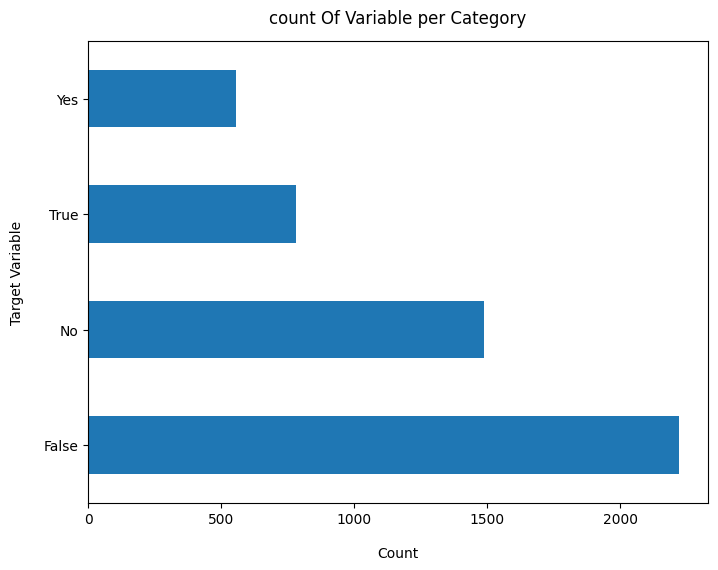

In [ ]:
train_data['Churn'].value_counts().plot(kind='barh', figsize= (8,6)) 
plt.xlabel('Count',labelpad =14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("count Of Variable per Category", y=1.02); 

In [ ]:
# Getting the Percentage  of Counts. 

100*train_data['Churn'].value_counts()/len(train_data['Churn'])


Churn
False    44.001586
No       29.486417
True     15.466984
Yes      11.025183
Name: count, dtype: float64

In [ ]:
# Finding the value counts in the Churn colunm
train_data["Churn"].value_counts()

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

### Univarite Analysis
- show the impact of the individual variables to the churn behavior of customers in histogram 
- find the relationship between categorical values and the target value, Churn
- find the relationship between  Numeric values against the target,'Churn'
-Compare monthly Charges with totalCharges
- TotalCharges vrs churn
- Montly Charges vrs Churn
- Gender has no impact on churning behavior

In [ ]:
# Counting the number of males and females who churned
churn_counts = train_data[train_data['Churn'] == 'Yes']['gender'].value_counts()
churn_counts

gender
Male      279
Female    277
Name: count, dtype: int64

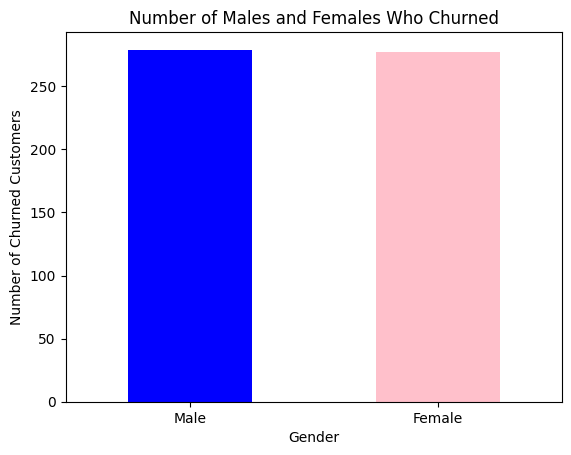

In [ ]:
# Plotting the results
churn_counts.plot(kind='bar', color=['blue', 'pink'])

# Adding titles and labels
plt.title('Number of Males and Females Who Churned')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=0)
plt.show()



## Data Cleaning And Preparation


In [ ]:
# Change TotalCharges from object to float datatype
train_data.TotalCharges = pd.to_numeric(train_data.TotalCharges, errors='coerce')

### Checking for missing values

In [ ]:
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

Looking Into the Missing Values

In [ ]:
# Selecting rows where 'TotalCharges' is null
missing_total_charges = train_data[train_data['MultipleLines'].isnull()]
missing_total_charges
# Viewing the missing values in the specified columns for these rows
# missing_values_view = missing_total_charges[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

# Display the result
# missing_values_view

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
7,6713-OKOMC,Female,0,False,False,10,False,NaN,DSL,True,False,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
20,8779-QRDMV,Male,1,False,False,1,False,NaN,DSL,False,False,True,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True
27,8665-UTDHZ,Male,0,True,True,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,9443-JUBUO,Male,0,True,True,72,False,NaN,DSL,True,True,True,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False
2990,2309-OSFEU,Male,0,False,False,10,False,NaN,DSL,False,False,False,False,False,True,Month-to-month,True,Mailed check,33.900002,298.450012,True
2992,4177-JPDFU,Male,0,False,False,12,False,NaN,DSL,False,True,False,True,False,False,Month-to-month,False,Mailed check,34.000000,442.450012,False
2994,8046-DNVTL,Male,0,True,False,62,False,NaN,DSL,True,True,False,True,False,False,Two year,True,Credit card (automatic),38.599998,2345.550049,False


# Percentage Of Missing Values
train_data
missing = pd.DataFrame((train_data.isnull().sum())*100/.shape[0]).reset_index()

plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,train_data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Key Insights
- SeniorCitizen is a categorical data, hence values given in the describe cannot be used or are not proper
- 75% of customers have turner less than 56 months
- Average monthly charges are USD 65 where as 50% of customers pay more than USD 70 monthly
- Change TotalCharges from object to float datatype
- Drop all Nan/null  Values
- 


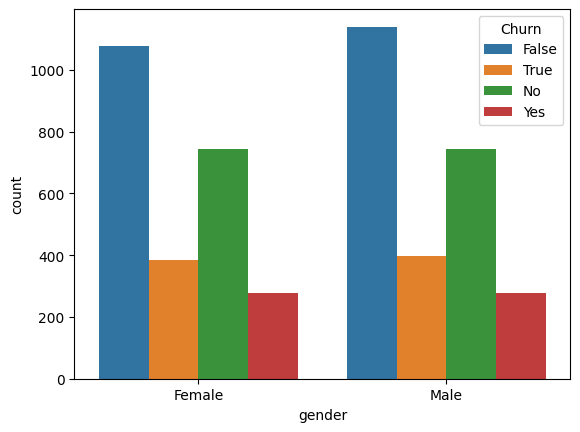

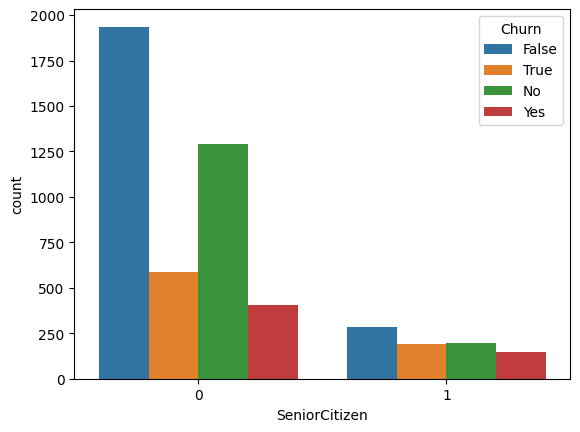

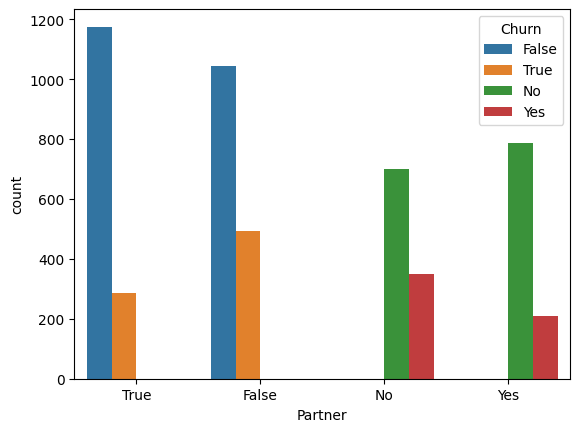

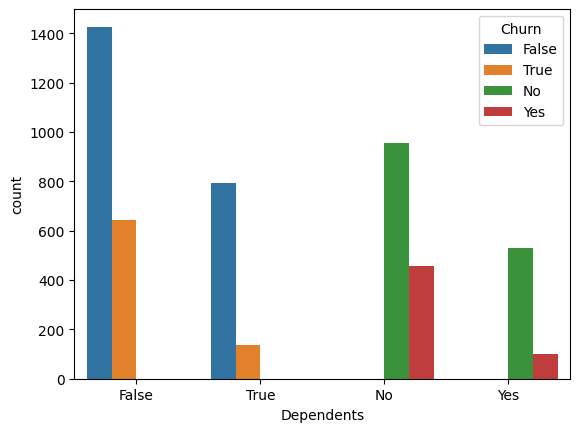

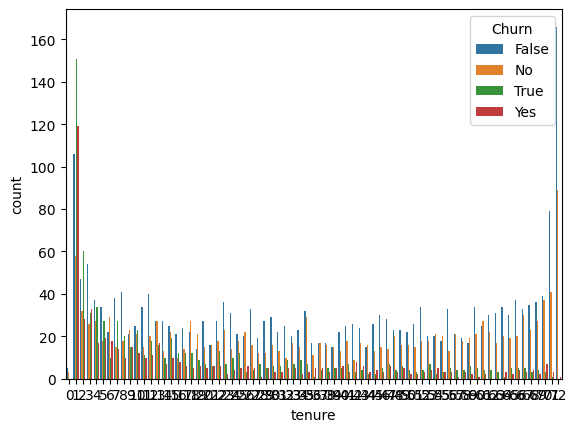

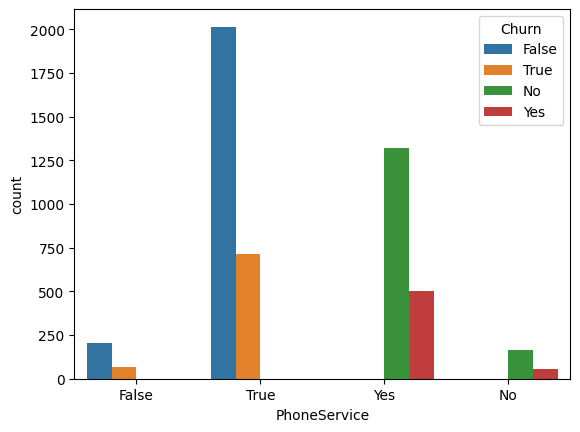

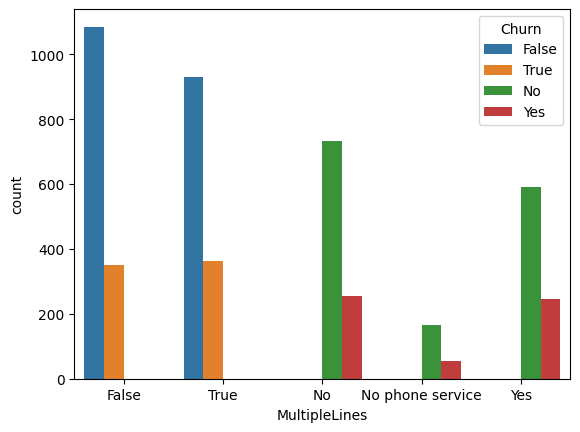

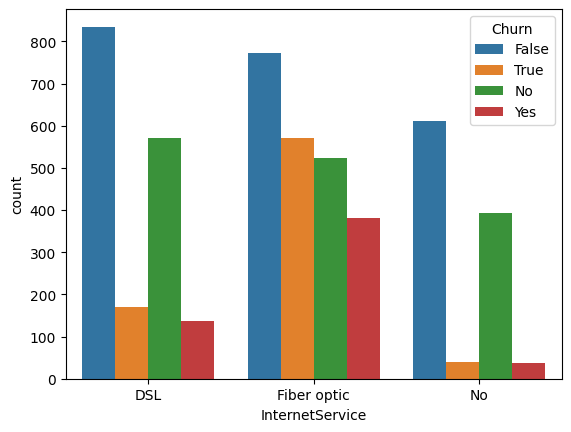

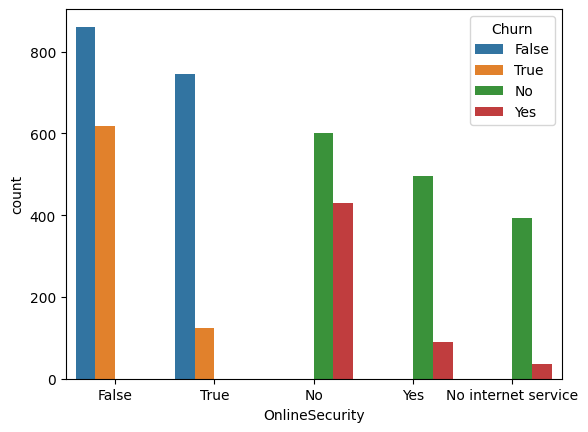

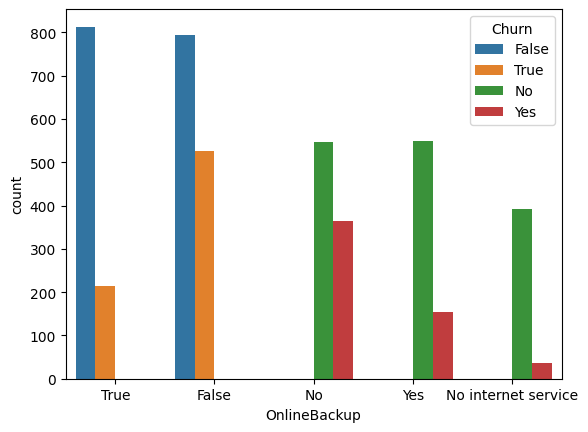

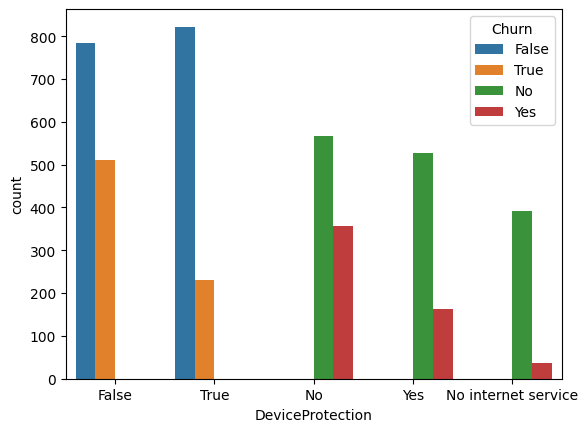

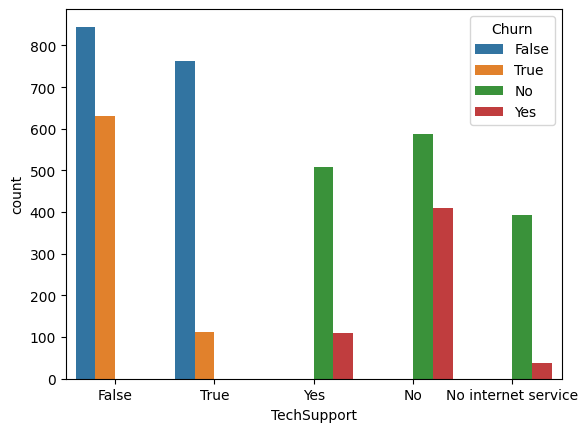

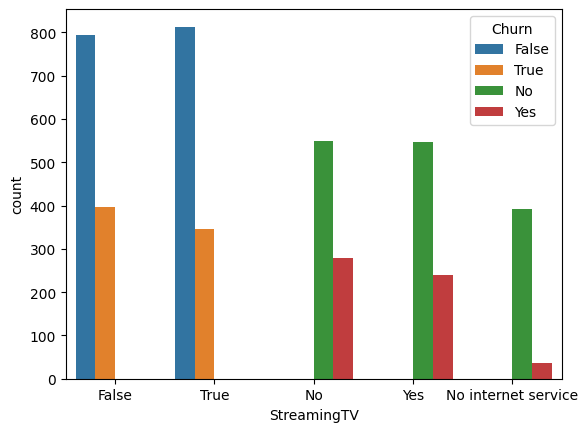

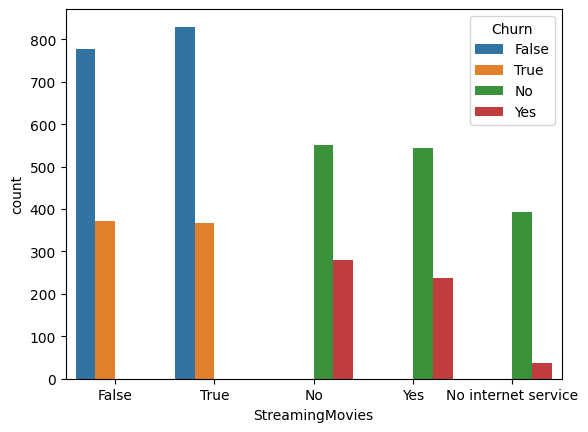

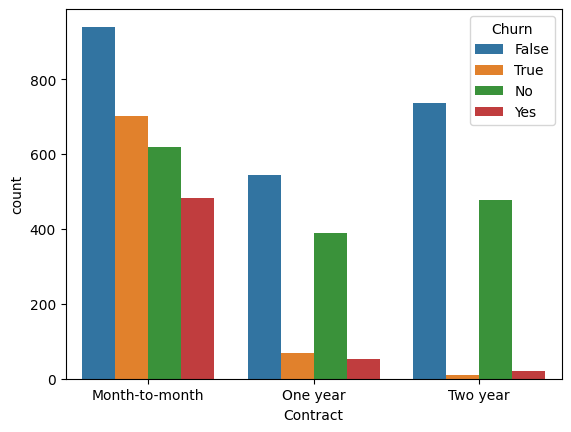

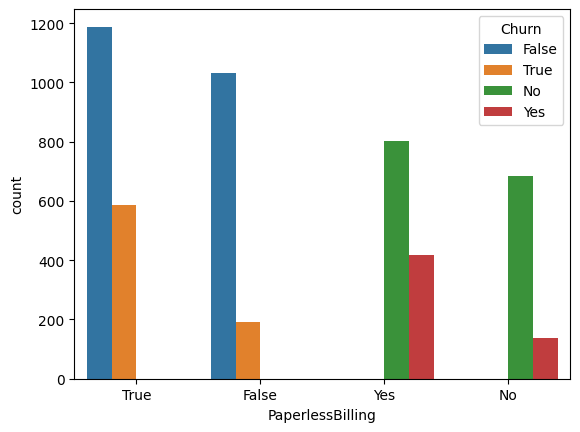

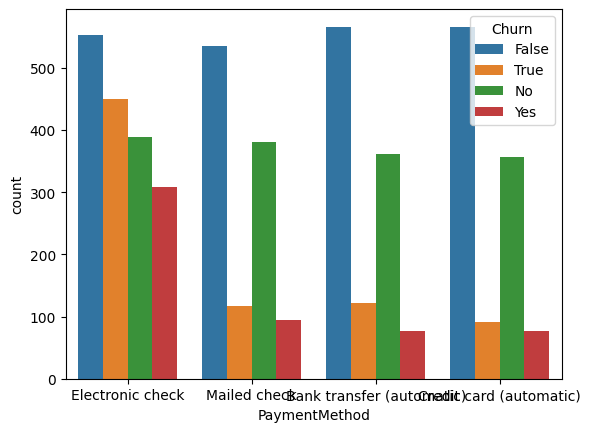

In [ ]:
for i, predictor in enumerate(train_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','customerID'])):
    plt.figure(i)
    sns.countplot(data=train_data, x=predictor, hue='Churn')